# Conditions
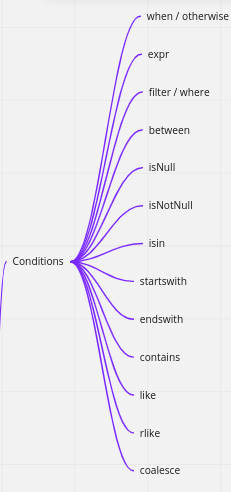

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql import functions as F
from pyspark.sql import Window

# Create SparkSession
spark = (SparkSession.builder
                    .appName('PySparkSyntax')
                    .getOrCreate()
        )

In [ ]:
# Create a PySpark DataFrame with some data
data = [("Alice", 12)
        , ("Bob", 30)
        , ("Charlie", 65)
        , ("Ana" , 80)
        , ("Gabriel", None)
        , ("amanda", None)]

columns = ["name", "age"]
df = spark.createDataFrame(data, columns)

# Show the sorted DataFrame
df.show()

### [when](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.when.html)
when(condition: pyspark.sql.column.Column, value: Any) → pyspark.sql.column.Column

Evaluates a list of conditions and returns one of multiple possible result expressions. If pyspark.sql.Column.otherwise() is not invoked, None is returned for unmatched conditions.

In [ ]:
df = df.withColumn('faixa_etaria', F.when(F.col('age').between(0, 12), F.lit('Crianca'))
                                    .when(F.col('age').between(12, 65), F.lit('Adulto'))
                                    .when(F.col('age')>65, F.lit('Idoso'))
                                    .otherwise('NA')
                  )
                                          
df.toPandas()

### [expr](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.expr.html#pyspark.sql.functions.expr)
expr(str: str) → pyspark.sql.column.Column

Parses the expression string into the column that it represents

In [ ]:
case_when = F.expr("""
    CASE
        WHEN age BETWEEN 18 AND 35
            THEN true
        ELSE false
    END
""")

df = df.withColumn('comprador', case_when)
df.limit(5).toPandas()

## [Filter](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.filter.html#pyspark.sql.DataFrame.filter)

DataFrame.filter(condition: ColumnOrName) → DataFrame

Filters rows using the given condition.

where() is an alias for filter()

## filter =

In [ ]:
df_filter = df.filter(F.col('age')=='30')
df_filter.show()

## filter = where

In [ ]:
df_filter = df.where(F.col('age')=='30')
df_filter.show()

## filter != ou ~

In [ ]:
df_filter = df.filter(F.col('age')!='30')
df_filter.show()

In [ ]:
df_filter = df.filter(~(F.col('age')=='30'))
df_filter.show()

## filter <

In [ ]:
df_filter = df.filter(F.col('age')<'30')
df_filter.show()

## filter >

In [ ]:
df_filter = df.filter(F.col('age')>'30')
df_filter.show()

# [between](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.Column.between.html?highlight=between#pyspark.sql.Column.between)

Column.between(lowerBound: Union[Column, LiteralType, DateTimeLiteral, DecimalLiteral], upperBound: Union[Column, LiteralType, DateTimeLiteral, DecimalLiteral]) → Column

True if the current column is between the lower bound and upper bound, inclusive.

In [ ]:
df_filter = df.filter(F.col('age').between(10, 12))
df_filter.show()

In [ ]:
maior_28 = F.col('age')>'10'
menor_28 = F.col('age')<='12'

df_filter = df.filter(maior_28 & menor_28)
df_filter.show()

## [isNotNull](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.Column.isNotNull.html#pyspark.sql.Column.isNotNull)

Column.isNotNull() → pyspark.sql.column.Column

True if the current expression is NOT null.

In [ ]:
df_isNotNull = df.filter(F.col('age').isNotNull())
df_isNotNull.show()

## [isNull](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.Column.isNull.html#pyspark.sql.Column.isNull)

Column.isNull() → pyspark.sql.column.Column

True if the current expression is null.

In [ ]:
df_isNull = df.filter(F.col('age').isNull())
df_isNull.show()

## [isin](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.Column.isin.html#pyspark.sql.Column.isin)

Column.isin(*cols: Any) → pyspark.sql.column.Column

A boolean expression that is evaluated to true if the value of this expression is contained by the evaluated values of the arguments.

In [ ]:
df_isin = df.filter(df.name.isin('Alice', 'Bob'))
df_isin.show()

In [ ]:
df_isin = df.filter(F.col('name').isin('Alice', 'Bob'))
df_isin.show()

In [ ]:
alice = F.col('name')=='Alice'
bob = F.col('name')=='Bob'

df_isin = df.filter(alice | bob)
df_isin.show()

## [startswith](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.Column.startswith.html#pyspark.sql.Column.startswith)

Column.startswith(other: Union[Column, LiteralType, DecimalLiteral, DateTimeLiteral]) → Column

String starts with. Returns a boolean Column based on a string match.

In [ ]:
df_startswith = df.filter(F.col('name').startswith('A'))
df_startswith.show()                 

## [endswith](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.Column.endswith.html?highlight=endswith#pyspark.sql.Column.endswith)

Column.endswith(other: Union[Column, LiteralType, DecimalLiteral, DateTimeLiteral]) → Column

String ends with. Returns a boolean Column based on a string match.

In [ ]:
df_endswith = df.filter(F.col('name').endswith('el'))
df_endswith.show()  

## [contains](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.Column.contains.html#pyspark.sql.Column.contains)

Column.contains(other: Union[Column, LiteralType, DecimalLiteral, DateTimeLiteral]) → Column

Contains the other element. Returns a boolean Column based on a string match.

In [ ]:
df_contains = df.filter(F.col('name').contains('lic'))
df_contains.show()  

## [like](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.Column.like.html#pyspark.sql.Column.like)

Column.like(other: Union[Column, LiteralType, DecimalLiteral, DateTimeLiteral]) → Column

SQL like expression. Returns a boolean Column based on a SQL LIKE match.

In [ ]:
df_like = df.filter(F.col('name').like('A%'))
df_like.show()  

In [ ]:
df_like = df.filter(F.col('name').like('%el'))
df_like.show()  

In [ ]:
df_like = df.filter(F.col('name').like('%lic%'))
df_like.show()  

# [rlike](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.Column.rlike.html#pyspark.sql.Column.rlike)

Column.rlike(other: Union[Column, LiteralType, DecimalLiteral, DateTimeLiteral]) → Column

SQL RLIKE expression (LIKE with Regex). Returns a boolean Column based on a regex match.

In [ ]:
df_rlike = df.filter(F.col('name').rlike('^[aA]'))
df_rlike.show()  

In [ ]:
df_rlike = df.filter(F.col('name').rlike('(?i)^a'))
df_rlike.show()  

In [ ]:
df_rlike = df.filter(F.col('name').rlike('(?i)^A'))
df_rlike.show()  

## [coalesce](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.coalesce.html#pyspark.sql.functions.coalesce)

pyspark.sql.functions.coalesce(*cols: ColumnOrName) → pyspark.sql.column.Column

Returns the first column that is not null.

In [ ]:
df = spark.createDataFrame([("A", 50, None, 40), 
                            ("B", 10, 20, 30), 
                            ("C", None, None, 5), 
                            ("D", None, None, None),
                            ("E", None, 15, None)],
                           ["produto", "semana1", "semana2", "semana3"])

print("DataFrame original:")
df.show()

In [ ]:
df = df.withColumn("vendas_ultima_semana", F.coalesce(F.col("semana1"), F.col("semana2"), F.col("semana3")))

df.show()